<a href="https://colab.research.google.com/github/musicabbage/ml/blob/master/ML_Coursework_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas
import numpy

drive.mount('/content/drive')
!ls  /content

# specifying the full path for the unzipped xls file for the 28_features version
# of the dataset 
feat_data_file_full_path = "/content/drive/MyDrive/Colab Notebooks/Dry_Bean_Dataset.xlsx"

# loading the data from the xls file
bean_data = pandas.read_excel(feat_data_file_full_path)
bean_data.head()

Mounted at /content/drive
drive  sample_data


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Explore data

In [ ]:
bean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [ ]:
import matplotlib.pyplot as plt

# for col in bean_data.columns[:-1]:
#     plt.title(col)
#     bean_data[col].plot.hist() #plotting the histogram with Pandas
#     plt.show();


In [ ]:
import seaborn as sns

# for feature_1 in bean_data.columns[:-1]:
#     for feature_2 in bean_data.columns[:-1]:
#         if feature_1 != feature_2: # test if the features are different
#             print(feature_1, feature_2) # prints features names
#             sns.scatterplot(x=feature_1, y=feature_2, data=bean_data, hue='Class') # plots each feature points with its color depending on the class column value
#             plt.show();


In [ ]:
# sns.pairplot(bean_data, hue='Class');

# Devide data

## separate the dependent variable from the independent variables.

In [ ]:
# drop duplicate data
bean_data_duplicated_dropped = bean_data.drop_duplicates()
y = bean_data_duplicated_dropped['Class']
x = bean_data_duplicated_dropped.drop('Class', axis=1)
x.head()  #check `Class` column is removed

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


## split data into training and testing data set

In [ ]:
from sklearn.model_selection import train_test_split

# random seed
random_seed = 1
# size of training/test/validation data set
test_size = 0.2
val_size = 0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_seed)


print(f'There are {x_train.shape[0]} samples for training and {x_test.shape[0]} samples for testing.')

There are 10834 samples for training and 2709 samples for testing.


## normalize training data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

scaler = RobustScaler().fit(x_train)
x_train_normalized = scaler.transform(x_train)

# Balance data (In progress)


In [ ]:
%%capture
%%bash
pip install imbalanced-learn

<Axes: ylabel='Class'>

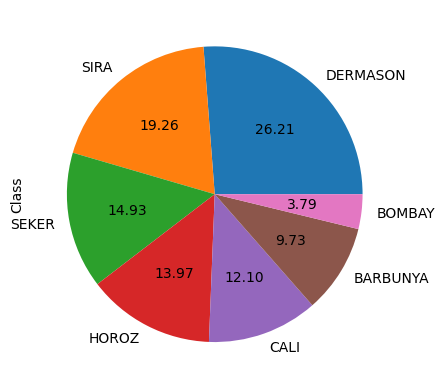

In [ ]:
y_train.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import make_pipeline

# pipe = make_pipeline(RandomOverSampler(random_state=0), svc)
# pipe.fit(x_train, y_train)

from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_normalized, y_train)
y_train_resampled.value_counts()

CALI        2840
HOROZ       2840
DERMASON    2840
SIRA        2840
SEKER       2840
BARBUNYA    2840
BOMBAY      2840
Name: Class, dtype: int64

# Train model

## Find the best model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters_dictionary = {'kernel':['poly', 'rbf'], 
                         'C':[2, 8, 16], 
                         'gamma':[0.25, 1, 8]}
svc = SVC()

grid_search = GridSearchCV(svc, 
                           parameters_dictionary, 
                           scoring = 'f1_macro',
                           return_train_score=True, 
                           cv = 5,
                           verbose = 1) # Displays how many combinations of parameters and folds we'll have, for more information as the time to run each search, use 2 or 3 values instead of 1)
grid_search.fit(x_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_
best_f1 = grid_search.best_score_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
from sklearn.svm import SVC
###
# The best model was: SVC(C=17, gamma=1.1)
# The best parameter values were: {'C': 17, 'gamma': 1.1, 'kernel': 'rbf'}
# The best f1-score was: 0.9607446864428522
###

# svc = SVC(C=10, gamma=1, kernel='linear')
svc = SVC(C=10, gamma=1)
# svc = SVC(C=10, kernel='rbf', degree=3, gamma='scale', class_weight=None, random_state=random_seed)
svc.fit(x_train_resampled, y_train_resampled)

SVC(C=10, gamma=1)

## Lab-Based

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

c_options = [0.1, 10.0, 12.0]
best_c_index = 0
best_c_perf = 0
# val_labels = bean_classes[val_set_ids]
# train_labels = bean_classes[train_set_ids];
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = test_size, random_state = random_seed)


for c in c_options:
  print("\n for c="+str(c)+"...")
  model = SVC(C=c, kernel='linear', degree=3, gamma='scale', class_weight=None, random_state=random_seed)
  model.fit(x_train, y_train)
  val_pred = model.predict(x_val)

  avg_f1_score = f1_score(y_val, val_pred, average='macro')
  print("\n f1 score: "+str(avg_f1_score))

  print(classification_report(y_val,val_pred))
  
  if avg_f1_score > best_c_perf:
    best_c = c
    best_c_perf = avg_f1_score

print('\n The optimal c for this data is: '+str(best_c))

# # Use the optimized hyperparameter to train the final model
# svc_model = SVC(C=best_c, kernel='rbf', degree=3, gamma='scale', class_weight=None, random_state=random_seed)
# svc_model.fit(scaled_bean_feats[train_set_ids, :], train_labels)

# # Evaluate the trained model using the test set
# test_labels = bean_classes[test_set_ids]
# test_pred = model.predict(scaled_bean_feats[test_set_ids, :])

# avg_f1_score = f1_score(test_labels, test_pred, average='macro')
# f1_scores = f1_score(test_labels, test_pred, average=None)
# print('\n The F1 scores for each of the classes are: '+str(f1_scores))
# print('\n The average F1 score is: '+str(avg_f1_score))

# Make prediction

In [ ]:
x_test_normalized = scaler.transform(x_test)
y_pred = svc.predict(x_test_normalized)
# x_test_normalized

# lab
# svc_lab = SVC(C=0.1, kernel='rbf', degree=3, gamma='scale', class_weight=None, random_state=random_seed)
# svc_lab.fit(x_train, y_train)
# y_pred = svc_lab.predict(x_test)

# Evaluate model

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.90      0.91       270
      BOMBAY       1.00      0.97      0.99       103
        CALI       0.92      0.93      0.93       333
    DERMASON       0.93      0.92      0.92       705
       HOROZ       0.92      0.96      0.94       386
       SEKER       0.96      0.95      0.95       405
        SIRA       0.86      0.88      0.87       521

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

The accuracy score is 0.9221446933529196
The f1 score is 0.9305797418056905


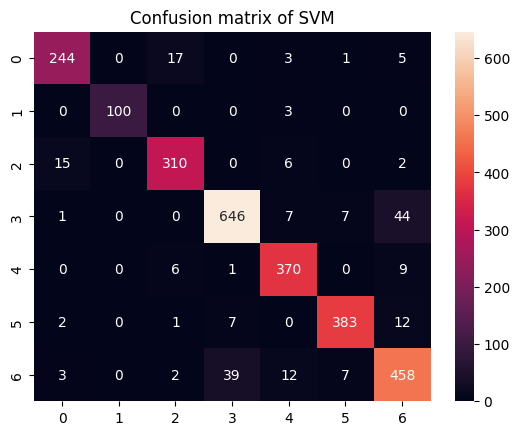

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))
print(f'The accuracy score is {accuracy_score(y_test, y_pred)}')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'The f1 score is {f1}')